# PROBLEM STATEMENT


---


Employee attrition is a critical concern in today's business landscape, with significant
implications for organizations worldwide. High attrition rates result in increased costs, reduced
productivity, and diminished morale. To address this issue, you must understand the underlying
factors driving attrition and develop effective retention strategies. This capstone project focuses
on analyzing the Employee Attrition dataset for a tech company, which provides comprehensive
information on employee demographics, job roles, satisfaction levels, compensation, and
work-life balance. By utilizing data analysis techniques, you can gain valuable insights into the
factors influencing attrition, leading to the proposal of potential solutions.
The impact of high attrition rates extends beyond individual organizations and has
significant economic consequences. Recruiting, hiring, and training new employees entail
substantial costs, compounded by the loss of institutional knowledge. Attrition also disrupts
productivity and hampers organizational growth, affecting economic performance at micro and
macro levels. By exploring the factors contributing to attrition and developing effective retention
strategies, this project contributes to the formulation of robust economic and fiscal policies that
foster stability, productivity, and sustainable growth within the business sector.


### Reading in the data


In [2]:
# importing the required libraries 

import pandas as pd 
import numpy as np 
import pygwalker as pyg
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')

In [3]:
# reading in the data 
data = pd.read_csv("Employee_Attrition.csv")

In [4]:
# checking the first few rows of the dataset

data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# checking the column types 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The dataset contains **1470 rows** and **34 columns**


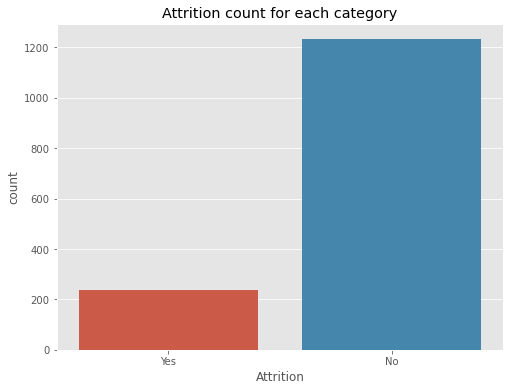

In [9]:
# Attrition count for categories 
plt.figure(figsize=(8, 6))
plt.title('Attrition count for each category')
plt.xlabel('Attrition')
plt.ylabel('Count')
sns.countplot(x="Attrition", data=data)
plt.show()

> As it is visible, it looks like that many of the employees do not quit and only some of the employees actually quit their jobs


This will later present a challenge when modelling where there will be some sort of resampling needed to be done to ensure that the machine learning model is able to learn sufficiently from both categories so that is able to capture the employees that are most likely to leave their jobs and any intervention is taken early enough


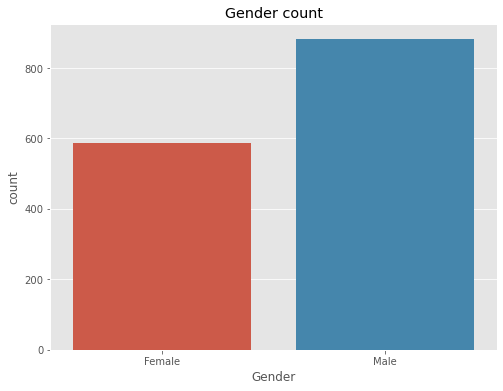

In [19]:
# Gender count 
plt.figure(figsize=(8, 6))
plt.title('Gender count')
plt.xlabel('Gender')
plt.ylabel('Count')
sns.countplot(x="Gender", data=data)
plt.show()

## Exploratory Data Analysis


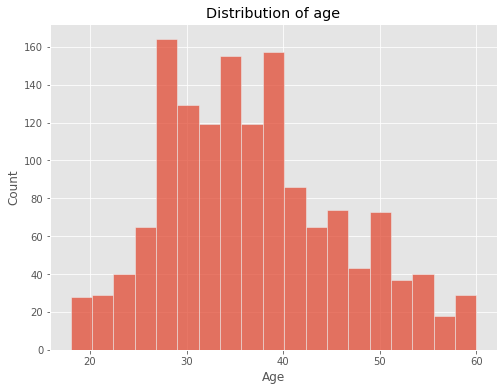

In [12]:
# distribution of age 
plt.figure(figsize=(8, 6))
sns.histplot(x="Age", data = data)
plt.title('Distribution of age')
plt.show()

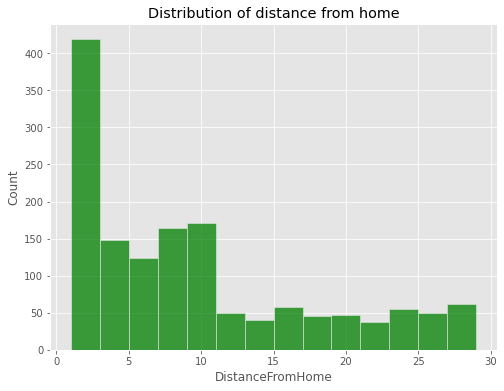

In [14]:
# distribution of distance from home 
plt.figure(figsize=(8, 6))
sns.histplot(x="DistanceFromHome",color='green', data = data)
plt.title('Distribution of distance from home')
plt.show()

In [13]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [18]:
# checking for unique values for each dataframe

def check_unique_values2(dataframe):
    unique_values = []
    for column in dataframe.columns:
        unique_count = dataframe[column].nunique()
        unique_values.append({'Column': column, 'Unique_Count': unique_count})
    return pd.DataFrame(unique_values)


check_unique_values2(data)

,Column,Unique_Count
0,Age,43
1,Attrition,2
2,BusinessTravel,3
3,DailyRate,886
4,Department,3
5,DistanceFromHome,29
6,Education,5
7,EducationField,6
8,EmployeeCount,1
9,EmployeeNumber,1470
